In [1]:
import numpy as np
import matplotlib.pyplot as plt

Von neumann analysis of

$$
\frac{\partial y}{\partial t} = -a\frac{\partial y}{\partial x}
$$

Local truncation error: Error of one iteration

Global truncation error: Cumulative error of many iterations

In [2]:
# TEMPORAL SCHEMES
# |g|<1 for stability
# mu = lambda*dt

def g_rk_1(mu):
    # local O(Δt^2)
    # global O(Δt) (first order method)
    return np.abs(1+mu)

def g_rk_2(mu):
    # local O(Δt^3)
    # global O(Δt^2) (second order method)
    return np.abs(1+mu + 0.5*mu**2)

def g_rk_3(mu):
    # local O(Δt^4)
    # global O(Δt^3) (third order method)
    return np.abs(1+mu+0.5*mu**2+1/6*mu**3)

def g_rk_4(mu):
    # local O(Δt^5)
    # global O(Δt^4) (fourth order method)
    return np.abs(1+mu+0.5*mu**2+1/6*mu**3+1/24*mu**4)

Upwind 3: Help. What is the scheme? Need to taylor expand and hell calculations?

In [3]:
# SPACIAL SCHEMES
# C = a*Δt/Δx
# beta = k*Δx

j = np.array([1j])

def mu_upwind_1(C, beta):
    # global O(Δx)
    return -C*(1-np.exp(-j*beta))

def mu_upwind_2(C, beta):
    # global O(Δx^2)
    return - C/2 * (3-4*np.exp(-j*beta)+np.exp(-2*j*beta))

def mu_central_2(C, beta):
    # global O(Δx^2)
    return -C/2 * (np.exp(j*beta) - np.exp(-j*beta))
    
def mu_central_4(C, beta):
    # global O(Δx^4)
    return - C/12 * (-np.exp(2*j*beta)+8*np.exp(j*beta)-8*np.exp(-j*beta)+np.exp(-2*j*beta))

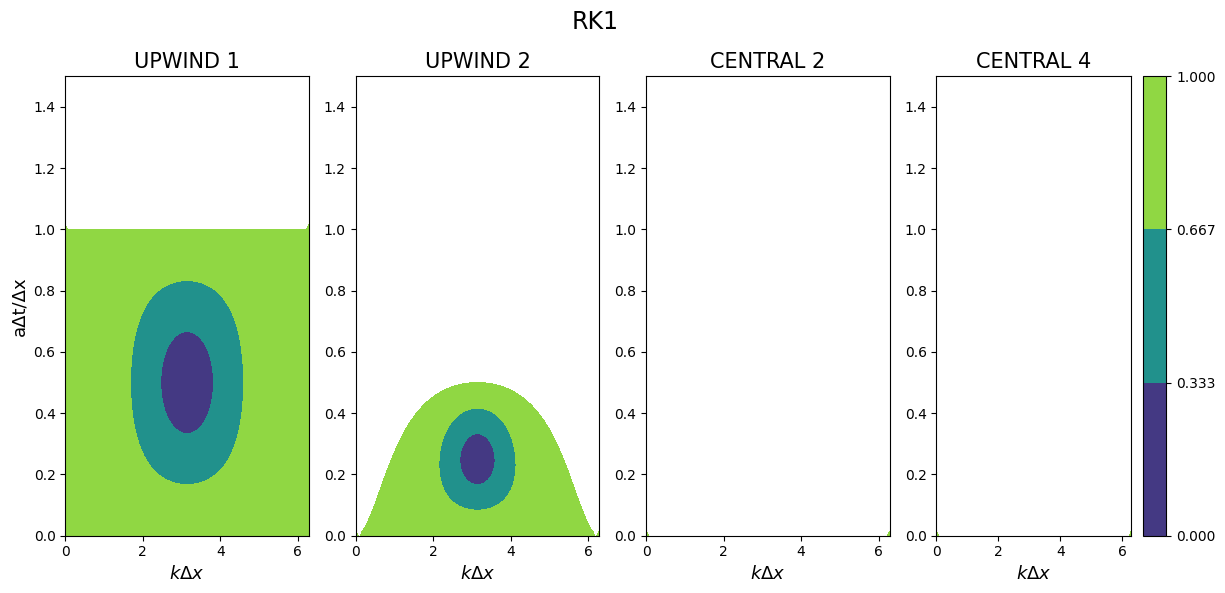

In [26]:
spacial_funcs = [mu_upwind_1, mu_upwind_2, mu_central_2, mu_central_4]

fig, ax = plt.subplots(ncols=len(spacial_funcs), figsize=(12,6))

fig.suptitle('RK1', fontsize=17)

C = np.linspace(0, 1.5, 100)
beta = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(C, beta)

i = 0

ax[0].set_ylabel( "aΔt/Δx", fontsize=13)

for s_func in spacial_funcs:
    contour = ax[i].contourf(Y, X, g_rk_1(s_func(X, Y)), levels=np.linspace(0,1,4), cmap="viridis",vmax=1)
    ax[i].set_xlabel(r"$k\Delta x$", fontsize=13)
    title = s_func.__name__.split("mu_")[1]
    words = title.split("_")
    words[0] = words[0].upper()
    title = ' '.join(words)
    ax[i].set_title(title, fontsize=15)
    i+=1
fig.tight_layout()
fig.colorbar(contour, ax=ax[-1])
plt.savefig("../thesis/drafts/von_neumann/vn_rk1.pdf", bbox_inches='tight')

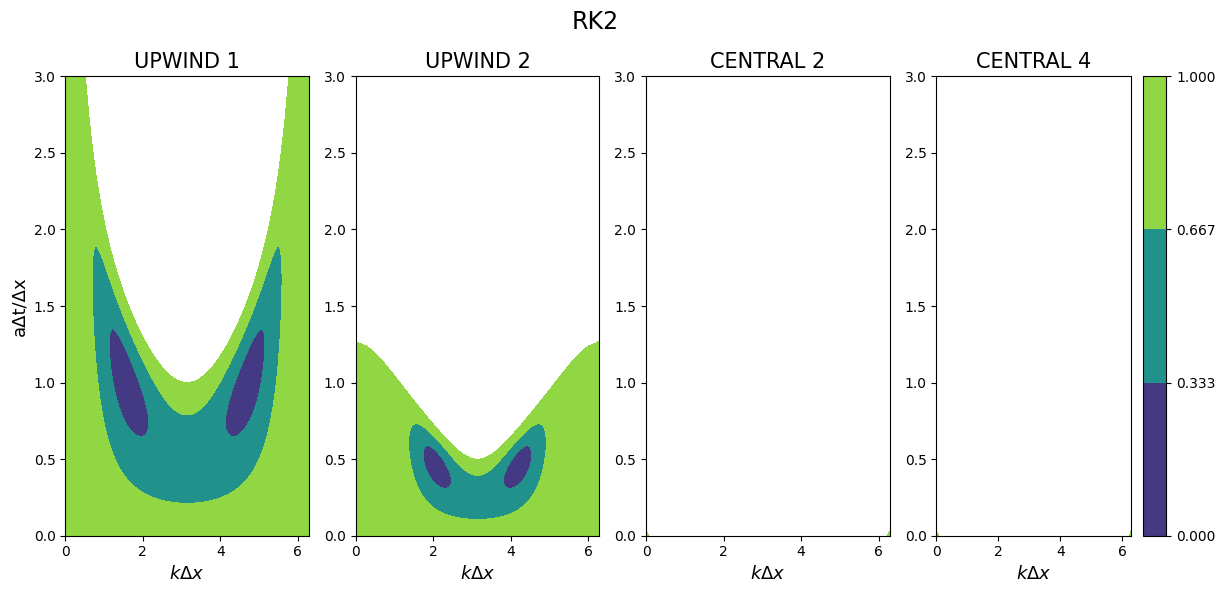

In [27]:
fig, ax = plt.subplots(ncols=len(spacial_funcs), figsize=(12,6))

fig.suptitle('RK2', fontsize=17)

C = np.linspace(0, 3, 100)
beta = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(C, beta)

i = 0

ax[0].set_ylabel( "aΔt/Δx", fontsize=13)

for s_func in spacial_funcs:
    contour = ax[i].contourf(Y, X, g_rk_2(s_func(X, Y)), levels=np.linspace(0,1,4), cmap="viridis",vmax=1)
    ax[i].set_xlabel(r"$k\Delta x$", fontsize=13)
    title = s_func.__name__.split("mu_")[1]
    words = title.split("_")
    words[0] = words[0].upper()
    title = ' '.join(words)
    ax[i].set_title(title, fontsize=15)
    i+=1
fig.tight_layout()
fig.colorbar(contour, ax=ax[-1])
plt.savefig("../thesis/drafts/von_neumann/vn_rk2.pdf", bbox_inches='tight')

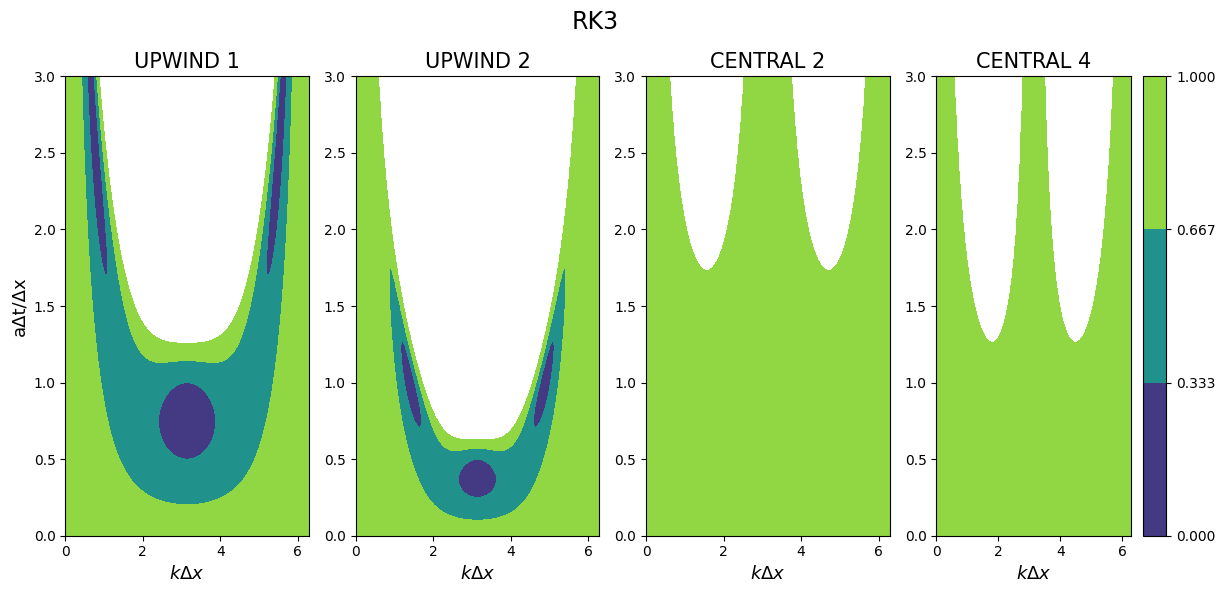

In [28]:
fig, ax = plt.subplots(ncols=len(spacial_funcs), figsize=(12,6))

fig.suptitle('RK3', fontsize=17)

C = np.linspace(0, 3, 100)
beta = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(C, beta)

i = 0

ax[0].set_ylabel( "aΔt/Δx", fontsize=13)

for s_func in spacial_funcs:
    contour = ax[i].contourf(Y, X, g_rk_3(s_func(X, Y)), levels=np.linspace(0,1,4), cmap="viridis",vmax=1)
    ax[i].set_xlabel(r"$k\Delta x$", fontsize=13)
    title = s_func.__name__.split("mu_")[1]
    words = title.split("_")
    words[0] = words[0].upper()
    title = ' '.join(words)
    ax[i].set_title(title, fontsize=15)
    i+=1
fig.tight_layout()
fig.colorbar(contour, ax=ax[-1])
plt.savefig("../thesis/drafts/von_neumann/vn_rk3.pdf", bbox_inches='tight')

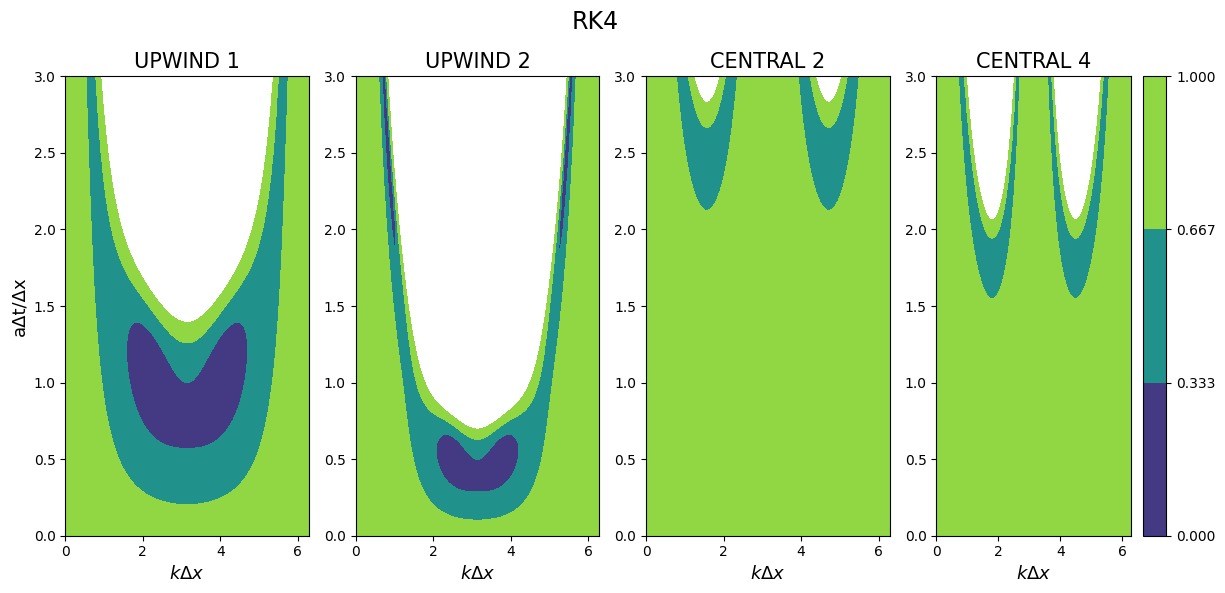

In [29]:
fig, ax = plt.subplots(ncols=len(spacial_funcs), figsize=(12,6))

fig.suptitle('RK4', fontsize=17)

C = np.linspace(0, 3, 100)
beta = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(C, beta)

i = 0

ax[0].set_ylabel( "aΔt/Δx", fontsize=13)

for s_func in spacial_funcs:
    contour = ax[i].contourf(Y, X, g_rk_4(s_func(X, Y)), levels=np.linspace(0,1,4), cmap="viridis",vmax=1)
    ax[i].set_xlabel(r"$k\Delta x$", fontsize=13)
    title = s_func.__name__.split("mu_")[1]
    words = title.split("_")
    words[0] = words[0].upper()
    title = ' '.join(words)
    ax[i].set_title(title, fontsize=15)
    i+=1
fig.tight_layout()
fig.colorbar(contour, ax=ax[-1])
plt.savefig("../thesis/drafts/von_neumann/vn_rk4.pdf", bbox_inches='tight')